In [1]:
DATASET_PATH = r"/Users/kidawr/Desktop/pythonProject/dataset_small.csv"

In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd

In [4]:
df = pd.read_csv(DATASET_PATH)

df.head()

/var/folders/wj/gnj268t13bl6dz6j0kg2sx280000gn/T/ipykernel_68067/2046229234.py:1: DtypeWarning: Columns (1672) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATASET_PATH)


,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_1664,pixel_1665,pixel_1666,pixel_1667,pixel_1668,pixel_1669,pixel_1670,pixel_1671,pixel_1672,label
0,-5.254530,-0.569596,6.344805,-3.380917,3.203426,-1.143426,-7.891048,-2.610459,-0.963249,-0.505788,...,-0.101692,-0.077913,-0.852660,0.530346,0.039475,-1.053974,-0.146754,0.228751,-0.631907,0
1,-9.995496,-4.633731,6.613166,0.829315,9.566810,-2.032633,-4.936915,-3.793391,-3.447060,-0.398183,...,-0.141613,-1.646326,-0.642386,1.383142,-0.242347,-1.253635,-0.741404,0.121868,-0.240069,0
2,-4.009331,-7.283738,-2.343139,3.853363,-5.308279,-5.684689,-3.064548,4.745645,1.028596,1.361845,...,-0.698284,0.667050,0.482680,0.212994,0.169312,-0.179353,-0.886870,0.637208,0.657808,0
3,-2.030828,-5.593181,-11.259305,-0.493159,6.978751,5.678419,-0.813766,4.897509,-2.776486,-0.613106,...,0.416916,-0.374833,0.149815,0.574161,-0.220023,0.698690,-1.338986,0.280161,-0.842836,0
4,-8.424750,-9.250905,4.228565,4.875258,3.498729,-10.048499,-4.697092,-0.551032,-3.204560,-0.759171,...,0.592175,-0.385816,0.455523,-0.036047,-0.267697,-0.779007,-0.149019,1.006753,-1.003270,0


In [5]:
X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy().astype(str)

X

array([[-5.25453027, -0.56959565,  6.34480516, ..., -0.14675405,
         0.2287505 , -0.63190703],
       [-9.99549625, -4.63373115,  6.61316576, ..., -0.74140399,
         0.12186804, -0.24006937],
       [-4.00933086, -7.28373809, -2.34313863, ..., -0.88686957,
         0.63720806,  0.6578076 ],
       ...,
       [ 5.07896734,  4.929835  ,  2.38631735, ..., -0.05472067,
         0.27151373, -0.68199373],
       [ 4.39151794,  5.75666309,  2.88870052, ..., -1.01339766,
         0.1612731 ,  0.29389006],
       [ 4.2440353 ,  5.54914639,  1.97654683, ...,  0.45101743,
         0.07251673,  0.36186793]])

Распределение меток:
label
0         5000
)         5000
i         5000
b         5000
X         5000
          ... 
Delta      137
lambda     109
in          47
forall      45
exists      21
Name: count, Length: 84, dtype: int64


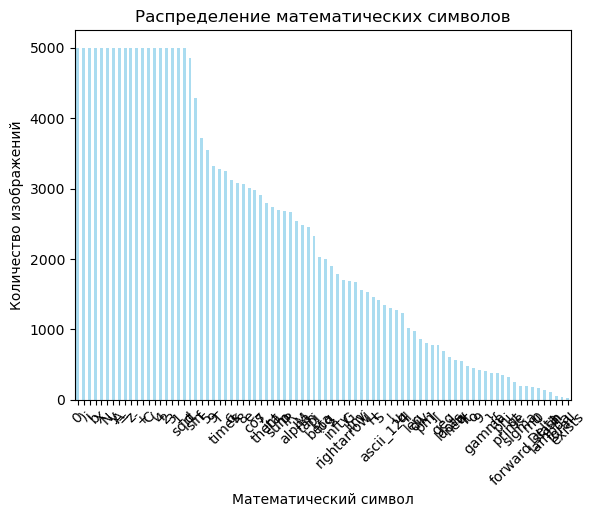

In [6]:
label_counts = df['label'].value_counts()

print("Распределение меток:")
print(label_counts)

label_counts.plot(kind='bar', alpha=0.7, color='skyblue')
plt.title("Распределение математических символов")
plt.xlabel("Математический символ")
plt.ylabel("Количество изображений")
plt.xticks(rotation=45)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 

In [13]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Макро-усредненный Precision: {precision_macro:.4f}")
print(f"Макро-усредненный Recall: {recall_macro:.4f}")
print(f"Макро-усредненный F1: {f1_macro:.4f}")

Макро-усредненный Precision: 0.9804
Макро-усредненный Recall: 0.9710
Макро-усредненный F1: 0.9733


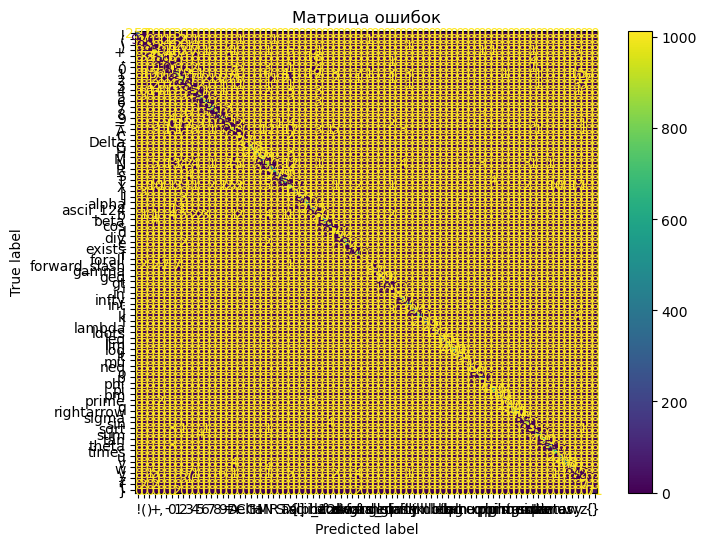

In [17]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_pred))
disp.plot(ax=ax)

plt.title("Матрица ошибок")
plt.show()

In [18]:
joblib.dump(model, 'random_forest_model.pkl')

print("Модель сохранена в файл 'random_forest_model.pkl'")

Модель сохранена в файл 'random_forest_model.pkl'
